# Árbol de decisión para especies de flores

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mainpath = "C:/Users/Esneider Infante/Documentos/Python Machine Learning Udemy/python-ml-course/datasets/"
filename = "iris/iris.csv"
fullpath = mainpath+filename
data = pd.read_csv(fullpath)

In [3]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

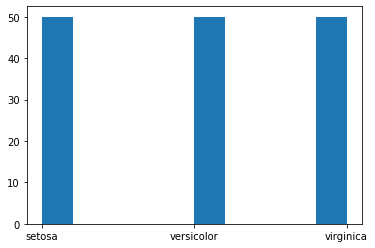

In [6]:
plt.hist(data.Species)

In [7]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [9]:
data["is_train"] = np.random.uniform(0,1,len(data))<=0.75

In [10]:
train, test = data[data["is_train"]==True], data[data["is_train"]==False]

In [11]:
test.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
5,5.4,3.9,1.7,0.4,setosa,False
6,4.6,3.4,1.4,0.3,setosa,False
12,4.8,3.0,1.4,0.1,setosa,False
13,4.3,3.0,1.1,0.1,setosa,False
20,5.4,3.4,1.7,0.2,setosa,False


In [12]:
train.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [14]:
arbol = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
arbol.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [15]:
preds = arbol.predict(test[predictors])

In [16]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,14,0,0
versicolor,0,12,0
virginica,0,1,13


## Visualización del árbol de decisión

In [17]:
##from sklearn.tree import export_graphviz
##plot dot file

In [18]:
##with open ("C:/Users/Esneider Infante/Documentos/Python Machine Learning Udemy/python-ml-course/notebooks/resources/iris_dtree.dot","w") as dotfile:
##    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
##    dotfile.close()

In [19]:
##import os
##from graphviz import Source

In [20]:
##file = open("C:/Users/Esneider Infante/Documentos/Python Machine Learning Udemy/python-ml-course/notebooks/resources/iris_dtree.dot","r")
##text = file.read()
##text

In [21]:
##Source(text)

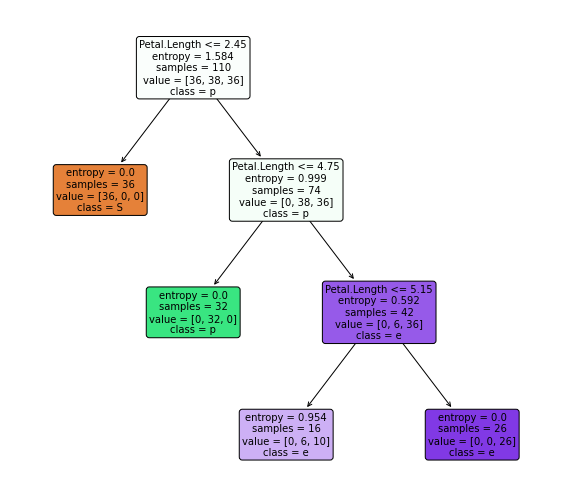

In [22]:
## Dibujar arbol
##flecha izquierda=true, fecha derecha=false
plt.figure(figsize=(10,9))
tree.plot_tree(arbol,feature_names=predictors,class_names=target,
               filled=True, rounded=True, fontsize=10);

## Cross Validation para la poda

In [23]:
X = data[predictors]
Y = data[target]

In [24]:
arbol = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
arbol.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [25]:
from sklearn.model_selection import KFold

In [26]:
cv = KFold( n_splits=10, shuffle=True, random_state=1)

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
scores = cross_val_score(arbol, X, Y, scoring="accuracy", cv=cv, n_jobs=1)
scores

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [29]:
score = np.mean(scores)

In [30]:
score

0.9333333333333333

In [31]:
##Evaluación de diferentes profundidades del árbol
for i in range(1,11):
    arbol = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    arbol.fit(X,Y)
    cv = KFold( n_splits=10, shuffle=True, random_state=1)
    scores = cross_val_score(arbol, X, Y, scoring="accuracy", cv=cv, n_jobs=1)
    score = np.mean(scores)
    print("Score para i=",i, " es de ", score)
    print("     ", arbol.feature_importances_)

Score para i= 1  es de  0.5666666666666667
      [0. 0. 1. 0.]
Score para i= 2  es de  0.9200000000000002
      [0.         0.         0.66620285 0.33379715]
Score para i= 3  es de  0.9400000000000001
      [0.         0.         0.68976981 0.31023019]
Score para i= 4  es de  0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Score para i= 5  es de  0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Score para i= 6  es de  0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Score para i= 7  es de  0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Score para i= 8  es de  0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Score para i= 9  es de  0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Score para i= 10  es de  0.9333333333333333
      [0.         0.         0.66869158 0.33130842]


In [32]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)
forest.fit(X,Y)

RandomForestClassifier(n_jobs=2, oob_score=True)

In [38]:
#Probabilidad de caer en una clasificación
forest.oob_decision_function_

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [39]:
forest.oob_score_

0.94